# **INTRODUCTION TO ARTIFICIAL INTELLIGENCE - GAME TREE SOLVER**


## Imports

In [ ]:
import matplotlib.pyplot as plt

## CLASS & FUNCTION DESIGNS

### Functions

In [ ]:
# ---------------------------------------------- [Create tree from string]
def createTree(bluePrint):
  bluePrint = bluePrint.replace(' ', '')    # Remove spaces

  Layers = [layer for layer in bluePrint.split('|')]
  Layers = [child for child in [layer.split('-') for layer in bluePrint.split('|')]]

  # Create Node objects from String
  Root = GameNode(Layers[0][0])             # Root
  Root.layerState = isRootMax               # Root is max or min layer
  current_layer = [[[Root]]]

  for i in range(1, len(Layers)):
      new_layer = []
      for j in range(len(Layers[i])):
        nodes = Layers[i][j].split(',')
        nodes = [GameNode(name=node, depth=i) for node in nodes.copy()] # node objects
        new_layer.append(nodes.copy())
      current_layer.append(new_layer.copy())

  # Set child and parent nodes
  Layers = current_layer

  for i in range(len(Layers)):  # i is layer order
    child_order = 0
    for j in range(len(Layers[i])): # j is child nodes order
      for k in range(len(Layers[i][j])): # k is node order

        if not Layers[i][j][k].isLeaf:   # Node is not a leaf
          Layers[i][j][k].addChildren(Layers[i+1][child_order])
          child_order += 1

  return Root

In [ ]:
# ---------------------------------------------- [Node list function]
def get_node_list(root):
    node_list = [root]
    for child in root.children:
        node_list += get_node_list(child)

    node_list = sorted(node_list, key=lambda x: x.depth, reverse=False)
    return node_list

In [ ]:
# ---------------------------------------------- [Show Tree Design]
def showTree(root, showScore = False):
  tree = get_node_list(root)
  last_x = 0
  cur_depth = -1
  cur_parent_name = None

  for node in tree:
    if cur_depth < node.depth: # New layer
      last_x = 0
      cur_depth = node.depth

    if node.depth != 0 and cur_parent_name != node.parent.name:
      if last_x > 0:
        last_x += 7
      cur_parent_name = node.parent.name

    y = node.depth * -5
    x = last_x
    last_x += 5

    node.x = x
    node.y = y
    nodeColor = "blue" if node.layerState == 0 else "red"
    labelColor = "green" if not node.isPruned else "purple"
    lineType = "solid" if node.parent != None and not node.parent.isPruned else "dotted"
    NodeName = f'({node.score})' if (node.score != None and showScore) else node.name

    if node.parent != None:
      plt.plot([x, node.parent.x], [y, node.parent.y], color = 'black', linewidth = 2, marker='o', markerfacecolor='black', markersize=5, linestyle = lineType) # LINE

    plt.plot([x], [y], color = f'{nodeColor}', linewidth = 3, marker='o', markerfacecolor='black', markersize=10) # NODE
    plt.annotate(NodeName, (x, y), textcoords="offset points", xytext=(0,-2), ha='center', color = f'{labelColor}', size=7, weight='bold') # LABEL

  # generic settings
  plt.xlabel('x - axis')
  plt.ylabel('y - axis')
  plt.title(f'Game Tree')

  plt.show()

In [ ]:
# ---------------------------------------------- [Min-Max Solving]
def minmax(node):
    if node.isLeaf:
        return int(node.score)

    if node.layerState:               # For max value
        bestValue = float('-inf')
        for child in node.children:
            childValue = minmax(child)
            bestValue = max(bestValue, childValue)
        node.score = bestValue
        return bestValue

    else:                             # For min value
        bestValue = float('inf')
        for child in node.children:
            childValue = minmax(child)
            bestValue = min(bestValue, childValue)
        node.score = bestValue
        return bestValue

In [ ]:
# ---------------------------------------------- [Alpha and Beta Solving]
def alpha_beta_pruning(node, alpha, beta):
    print(f"Node({node.name}) ->", end=" ")
    if node.isLeaf:
        return node.score

    if node.layerState == 1:  # Max layer
        v = float('-inf')
        for child in node.children:
            if alpha >= beta: # Beta pruning
                node.isPruned = True
                print(f"[{node.name} Node pruned]", end ="\nStep) ")
                break

            v = max(v, alpha_beta_pruning(child, alpha, beta))
            alpha = max(alpha, v)
            print(f"[{node.name} alpha changed ({alpha})]", end ="\nStep) ")

        node.alpha = alpha
        node.beta = beta
        node.score = int(alpha)
        return float(v)

    else:  # Min layer
        v = float('inf')
        for child in node.children:
            if alpha >= beta: # Alpha pruning
                node.isPruned = True
                print(f"[{node.name} Node pruned]", end ="\nStep) ")
                break

            v = min(v, alpha_beta_pruning(child, alpha, beta))
            beta = min(beta, v)
            print(f"[{node.name} beta changed ({beta})]", end ="\nStep) ")

        node.alpha = alpha
        node.beta = beta
        node.score = int(beta)
        return float(v)

In [ ]:
# ---------------------------------------------- [Integer check]
def is_integer(s):
    if s[0] in ('-', '+'):
        return s[1:].isdigit()

    return s.isdigit()

### Node Class

In [ ]:
# ---------------------------------------------- [Node Class]

class GameNode:
    def __init__(self, name, depth = 0, parent=None):
        self.name = name
        self.children = []        # nodes
        self.parent = parent      # node
        self.depth = depth        # layer depth

        # Game tree solving
        self.score = int(name) if is_integer(name) else None
        self.layerState = None       # 1 for max and 0 for min
        self.isLeaf = is_integer(name)    # true for leaf false for not leaf

        # for alpha-beta solving
        self.alpha = float('-inf')
        self.beta = float('inf')
        self.isPruned = False

        # for drawing
        self.x = 0
        self.y = 0

    def addChildren(self, children):
      for child in children:
        child.parent = self
        child.layerState = abs(self.layerState-1)
        self.children.append(child)



## Create tree

In [ ]:
# Every layer seperate by '|' symbol
# Every node seperate by ',' symbol
# Every child group seperate by '-' symbol

#Tree_bluePrint = "A | B, Y, P | C, F, J - M - Q, T | 2, 1 - 6 - 1 - 8, 3 - 2, 3 - 4, 2, 6"

#Tree_bluePrint = "Root | A, B, C | D, E - F, G, H - J, K | 4, 3 - 6, 2 - 2, 1 - 9, 5 - 3, 1 - 5, 4 - 7,5"

Tree_bluePrint = "A | B, C | D, E - F, G | H, I - J, K - L, M - N, O | 11,12 - 9,7 - 15,16 - 8,1 - 3,5 - 1,6 - 10,4 - 13,9"
isRootMax = 1

## Create tree (Abstract Codes)

In [ ]:
Root = createTree(Tree_bluePrint) # Tree object

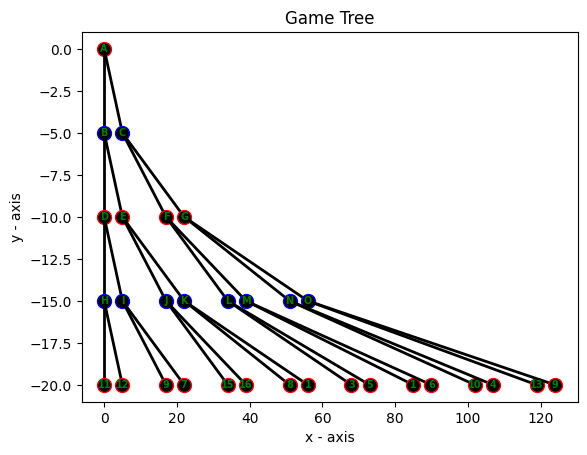

In [ ]:
showTree(Root) # Check ur Tree

## Min-Max solving

In [ ]:
root_num = minmax(Root)

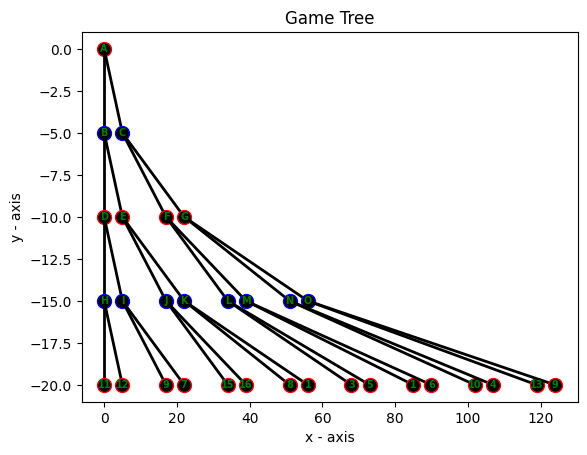

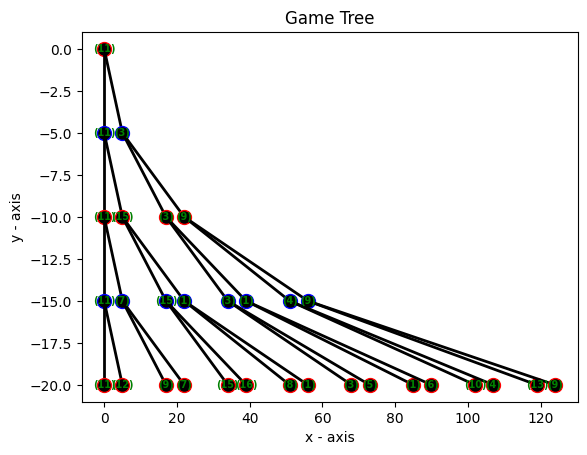

In [ ]:
showTree(Root)
showTree(Root, showScore=True)

## Alpha Beta Pruning

In [ ]:
Root2 = createTree(Tree_bluePrint) # Tree object

print("Step) ", end ="")
root_num = alpha_beta_pruning(Root2, Root2.alpha, Root2.beta)
print("END")

Step) Node(A) -> Node(B) -> Node(D) -> Node(H) -> Node(11) -> [H beta changed (11)]
Step) Node(12) -> [H beta changed (11)]
Step) [D alpha changed (11.0)]
Step) Node(I) -> Node(9) -> [I beta changed (9)]
Step) [I Node pruned]
Step) [D alpha changed (11.0)]
Step) [B beta changed (11.0)]
Step) Node(E) -> Node(J) -> Node(15) -> [J beta changed (11.0)]
Step) Node(16) -> [J beta changed (11.0)]
Step) [E alpha changed (15.0)]
Step) [E Node pruned]
Step) [B beta changed (11.0)]
Step) [A alpha changed (11.0)]
Step) Node(C) -> Node(F) -> Node(L) -> Node(3) -> [L beta changed (3)]
Step) [L Node pruned]
Step) [F alpha changed (11.0)]
Step) Node(M) -> Node(1) -> [M beta changed (1)]
Step) [M Node pruned]
Step) [F alpha changed (11.0)]
Step) [C beta changed (3.0)]
Step) [C Node pruned]
Step) [A alpha changed (11.0)]
Step) END


In [ ]:
tree = get_node_list(Root2)
for node in tree:
  if(not node.isLeaf):
    print(node.name, ") a=", node.alpha, "  beta=", node.beta, f"  pruned=({node.isPruned})")

A ) a= 11.0   beta= inf   pruned=(False)
B ) a= -inf   beta= 11.0   pruned=(False)
C ) a= 11.0   beta= 3.0   pruned=(True)
D ) a= 11.0   beta= inf   pruned=(False)
E ) a= 15.0   beta= 11.0   pruned=(True)
F ) a= 11.0   beta= inf   pruned=(False)
G ) a= -inf   beta= inf   pruned=(False)
H ) a= -inf   beta= 11   pruned=(False)
I ) a= 11.0   beta= 9   pruned=(True)
J ) a= -inf   beta= 11.0   pruned=(False)
K ) a= -inf   beta= inf   pruned=(False)
L ) a= 11.0   beta= 3   pruned=(True)
M ) a= 11.0   beta= 1   pruned=(True)
N ) a= -inf   beta= inf   pruned=(False)
O ) a= -inf   beta= inf   pruned=(False)


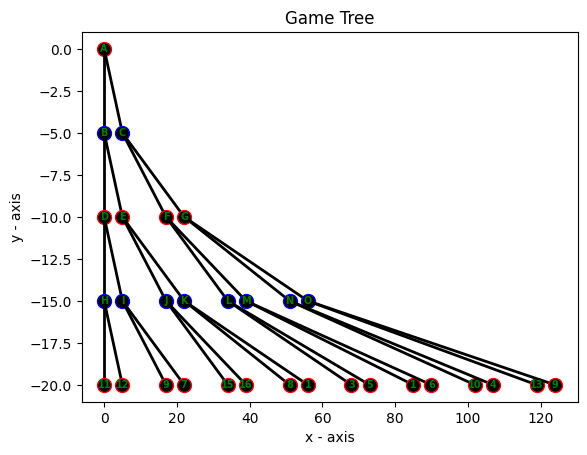

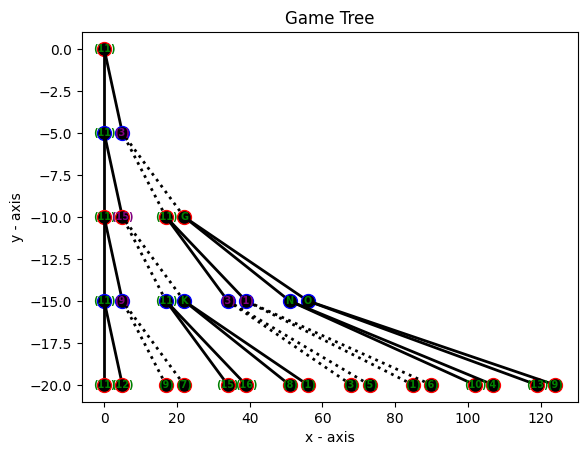

In [ ]:
showTree(Root)
showTree(Root2, showScore=True)

## Change the order of the branches in a way that will give you maximum number of pruned branches

In [ ]:
Root3 = createTree(Tree_bluePrint) # Tree object
tree3 = get_node_list(Root3)
minmax(Root3)

for node in tree3:
  if(not node.isLeaf):
    node.children = sorted(node.children, key=lambda x: x.score, reverse=(node.layerState==1))

alpha_beta_pruning(Root3, Root3.alpha, Root3.beta)

Node(A) -> Node(B) -> Node(D) -> Node(H) -> Node(11) -> [H beta changed (11)]
Step) Node(12) -> [H beta changed (11)]
Step) [D alpha changed (11.0)]
Step) Node(I) -> Node(7) -> [I beta changed (7)]
Step) [I Node pruned]
Step) [D alpha changed (11.0)]
Step) [B beta changed (11.0)]
Step) Node(E) -> Node(J) -> Node(15) -> [J beta changed (11.0)]
Step) Node(16) -> [J beta changed (11.0)]
Step) [E alpha changed (15.0)]
Step) [E Node pruned]
Step) [B beta changed (11.0)]
Step) [A alpha changed (11.0)]
Step) Node(C) -> Node(F) -> Node(L) -> Node(3) -> [L beta changed (3)]
Step) [L Node pruned]
Step) [F alpha changed (11.0)]
Step) Node(M) -> Node(1) -> [M beta changed (1)]
Step) [M Node pruned]
Step) [F alpha changed (11.0)]
Step) [C beta changed (3.0)]
Step) [C Node pruned]
Step) [A alpha changed (11.0)]
Step) 

11.0

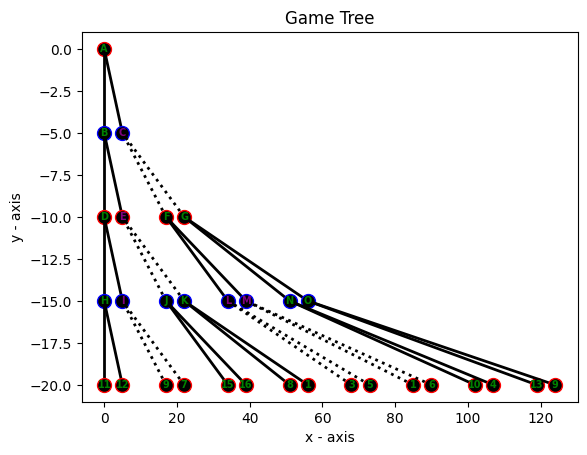

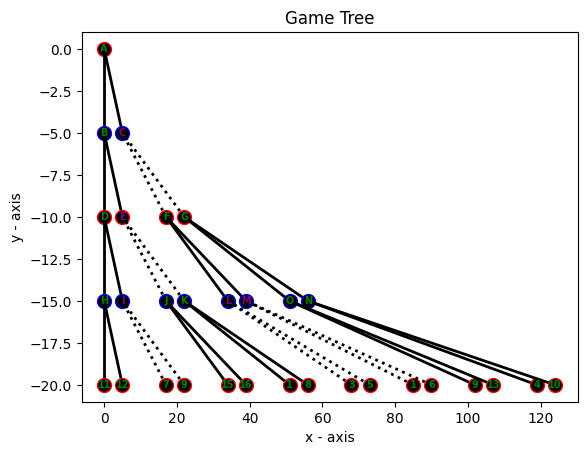

In [ ]:
showTree(Root2)
showTree(Root3)